<a href="https://colab.research.google.com/github/JuanmaVL/SyS/blob/main/Corte1/SLIT/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

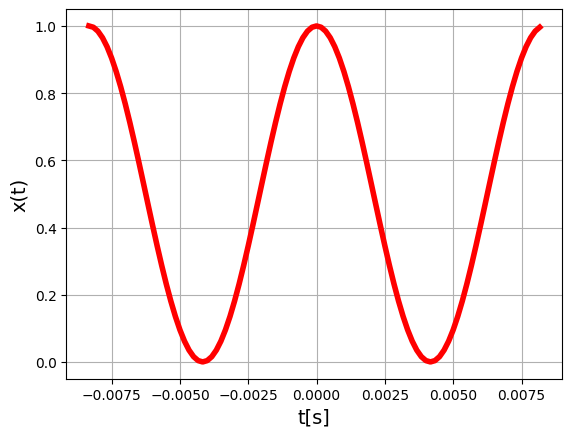

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#mostrar la señal
Fo = 60
T = 1/Fo
Fs = 100*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
A=1 #Constante definida
x1 = (A*np.cos(2*np.pi*Fo*tv))**2

#graficar señal original
plt.plot(tv,x1,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [ ]:
N = 50 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = 0*nv
Cn[N] = (A**2)/2 #Nivel DC
Cn[N+2] = (A**2)/4
Cn[N-2] = (A**2)/4

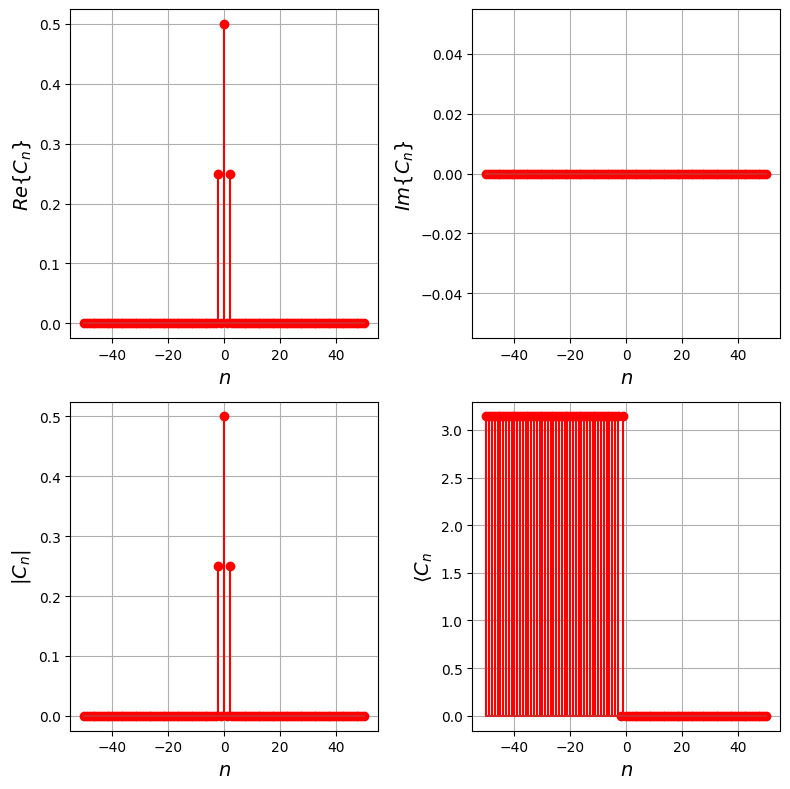

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

<ipython-input-5-06927cfba69c>:4: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')


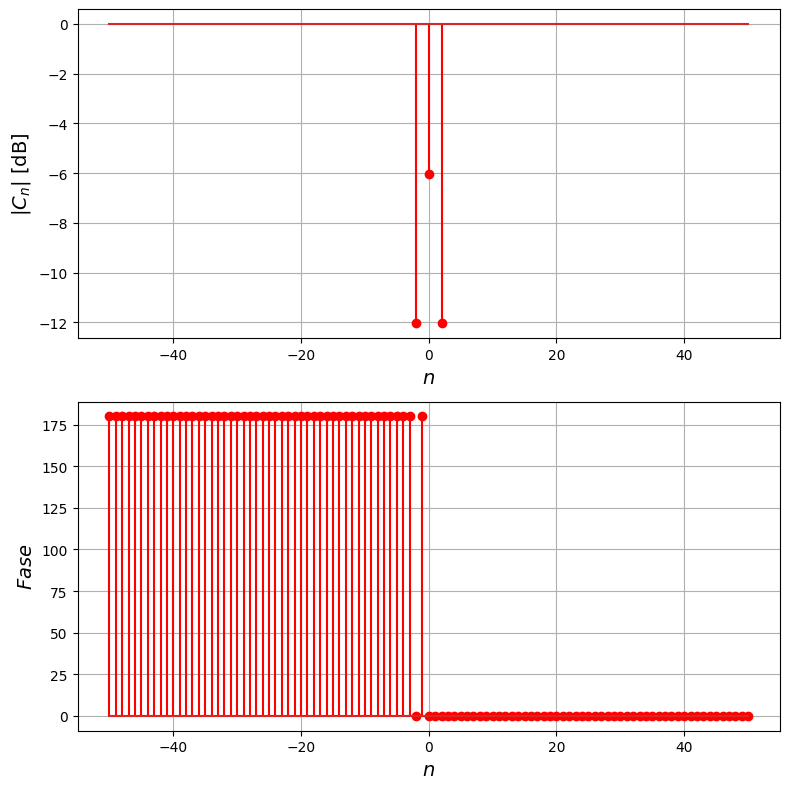

In [ ]:

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$ [dB]', fontsize=14)
plt.axis('tight')
plt.grid()


plt.subplot(2, 1, 2)
plt.stem(nv, np.angle(Cn, deg=True), 'r')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Fase$', fontsize=14)
plt.axis('tight')
plt.grid()

plt.tight_layout()

In [ ]:
from ipywidgets import interact, IntSlider

Px = 0.375  # Estimar según señal estudiada

def pltest(Na=1):
    ind = np.arange(N - Na, N + Na + 1)
    ind = np.clip(ind, 0, len(Cn) - 1)  # Evitar índices fuera de rango

    er = 1 - np.sum(abs(Cn[ind])**2) / Px

    # Señal reconstruida
    xe = phin[:, ind] @ Cn[ind].ravel()  # Ajustar dimensiones para multiplicación correcta

    plt.plot(tv, xe, color='b', marker='o', markersize=5, label='$x_e(t)$')  # Señal estimada
    plt.plot(tv, x1, color='r', label='x(t)')  # Señal original
    plt.title('$E_r$=%.2f[%%]' % (100 * er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

interact(pltest, Na=(0, N, 1))


interactive(children=(IntSlider(value=1, description='Na', max=50), Output()), _dom_classes=('widget-interact'…

<function __main__.pltest(Na=1)>

#SEGUNDO PUNTO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


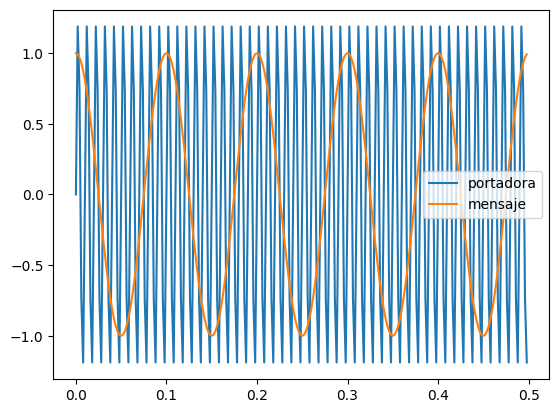

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

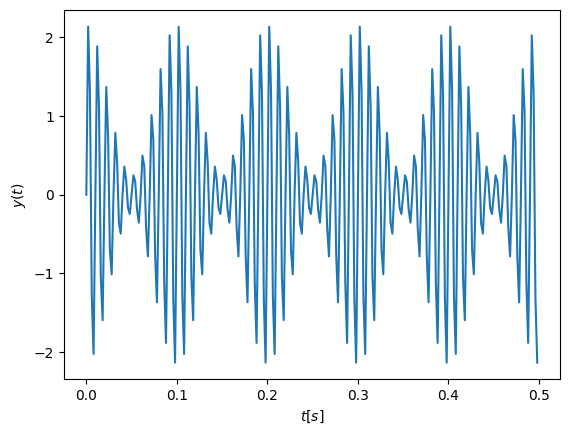

In [ ]:
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

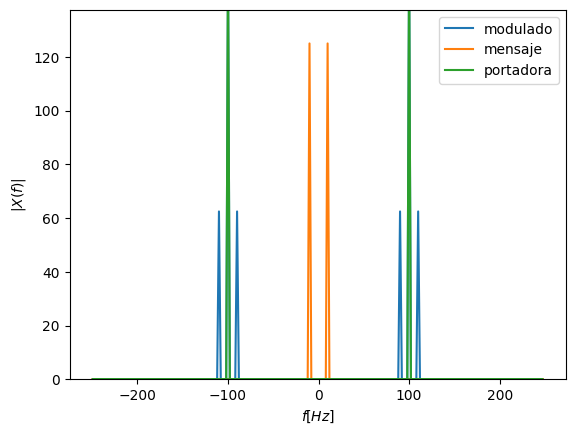

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [ ]:
#Se instala api para descargar videos desde youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     / 2.7 MB 12.0 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-_k9_wa4w/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [ ]:
link="https://www.youtube.com/watch?v=X2MGCIDOMZ4"
!yt-dlp --extract-audio -o "tema" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=X2MGCIDOMZ4
[youtube] X2MGCIDOMZ4: Downloading webpage
[youtube] X2MGCIDOMZ4: Downloading tv client config
[youtube] X2MGCIDOMZ4: Downloading player 0f7c1eff
[youtube] X2MGCIDOMZ4: Downloading tv player API JSON
[youtube] X2MGCIDOMZ4: Downloading ios player API JSON
[youtube] X2MGCIDOMZ4: Downloading m3u8 information
[info] X2MGCIDOMZ4: Downloading 1 format(s): 251
[download] Destination: tema
[download] 100% of    2.66MiB in 00:00:00 at 14.63MiB/s
[ExtractAudio] Destination: tema.mp3
Deleting original file tema (pass -k to keep)


In [ ]:
!ffmpeg -y -i tema.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
x.shape

(7594040, 2)

In [ ]:
from IPython.display import Audio
Audio(x[int(fs*20):int(fs*25),:].T,rate=fs)

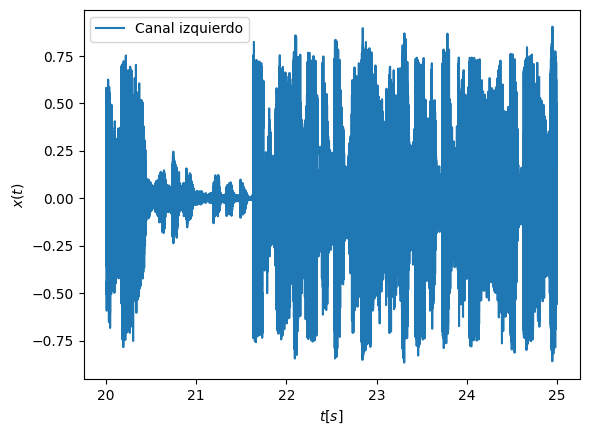

In [ ]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),0]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs,label="Canal izquierdo")
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

In [ ]:
len(xs)

240000

In [ ]:
Im=float(input("Ingrese el indice de modulacion que desea:  "))

Ingrese el indice de modulacion que desea:  0.8


In [ ]:
#Frecuencia portadora y muestreo

Fc = 1000 #frecuencia de portadora

ti = 20
tf = 25 #cantidad de periodos a graficar de la

Fs = 48000 #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo


Ac = max(abs(xs))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.1303329467773438


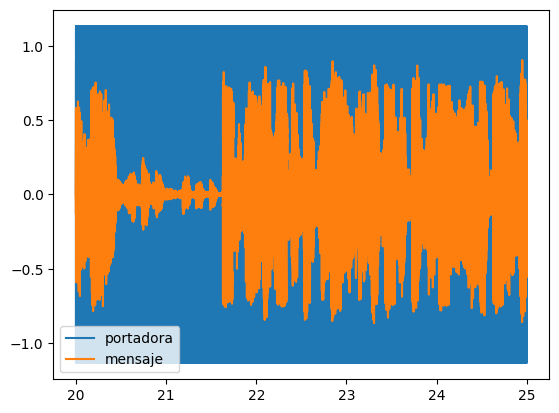

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,xs,label='mensaje')
plt.legend()
plt.show()

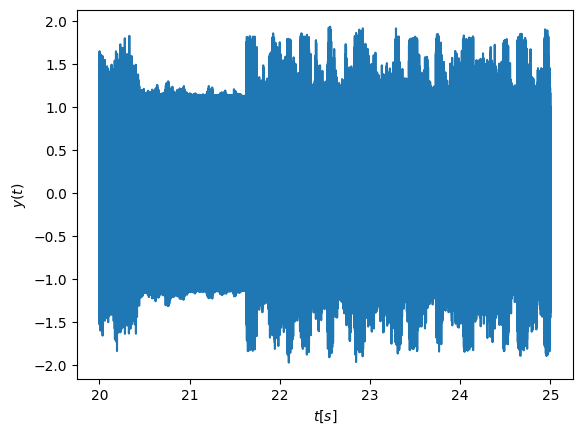

In [ ]:
y = (1+xs/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

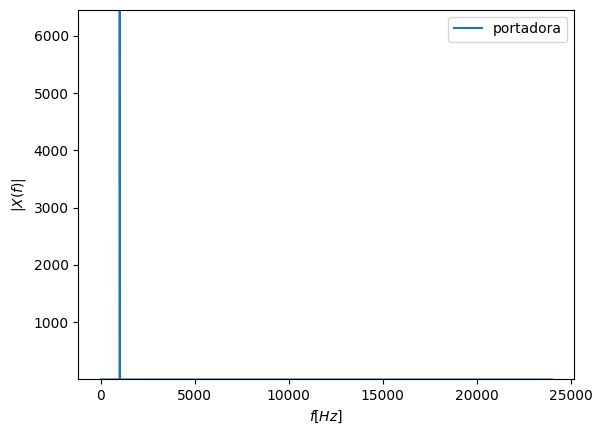

In [ ]:
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(xs)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

#plt.plot(vfre,abs(Xfy),label='modulado')
#plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

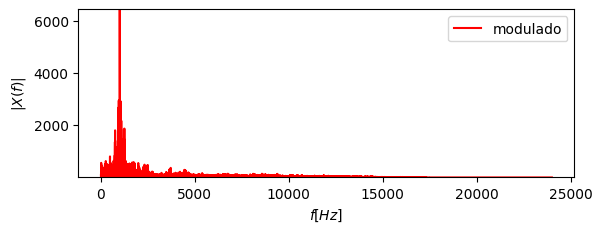

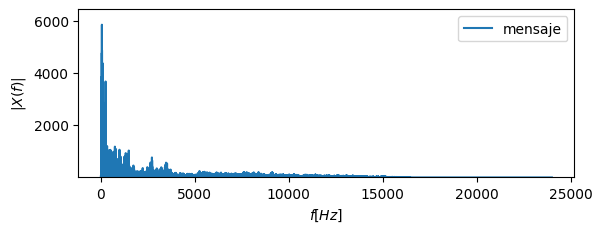

In [ ]:
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfy),label='modulado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [ ]:
Audio(c,rate=fs)

In [ ]:
Audio(xs,rate=fs)

In [ ]:
Audio(y,rate=fs)

#TERCER PUNTO

Distorción de Armónicos (THD)
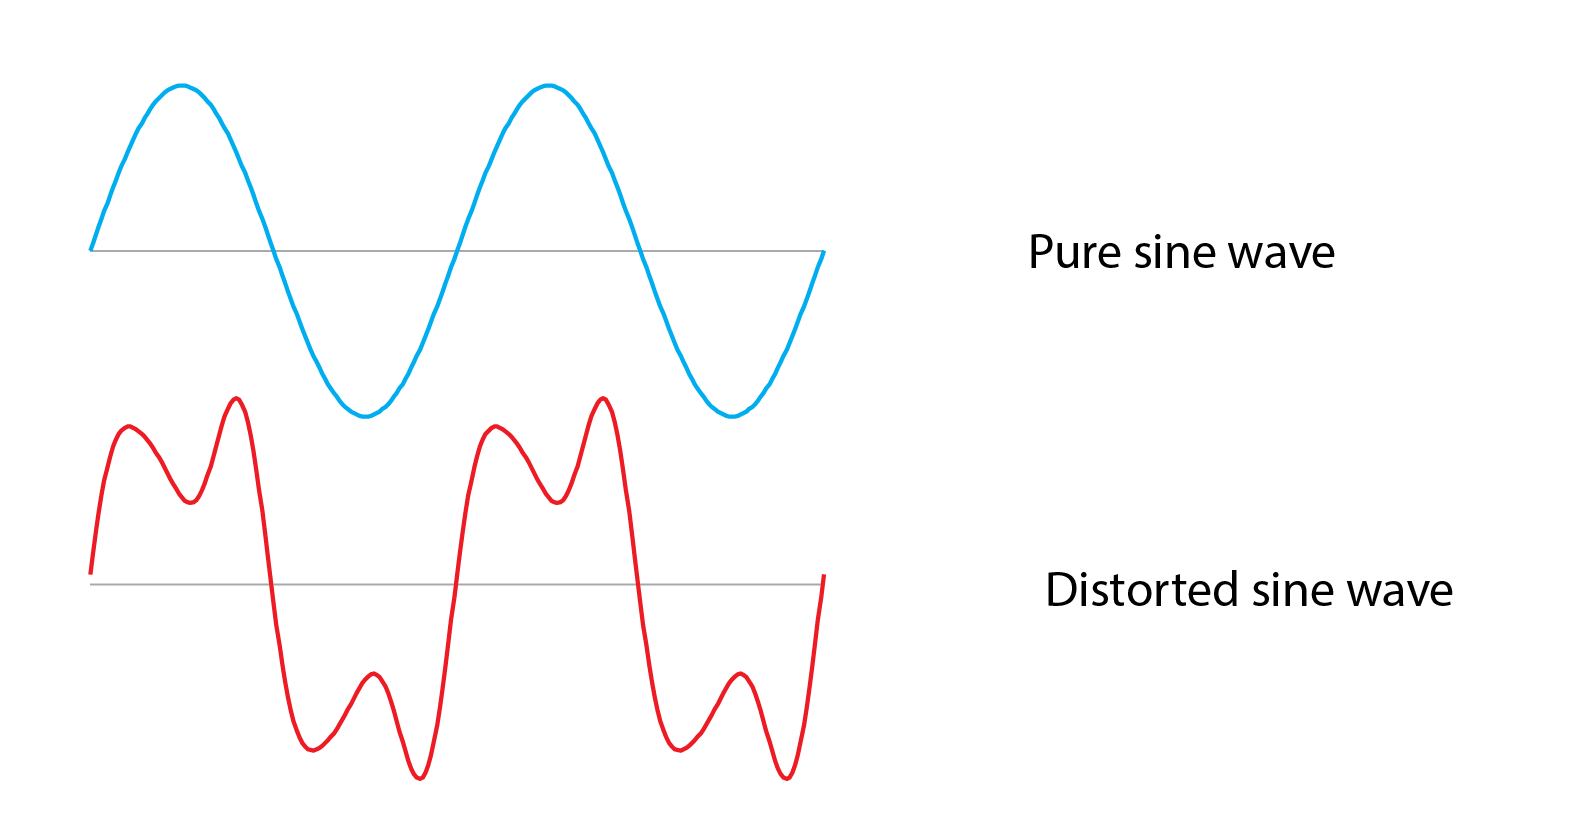

La forma de onda ideal de la fuente de alimentación de CA es una onda sinusoidal pura de 50 Hz o 60 Hz sin ningún ruido. Pero desafortunadamente, en realidad, es difícil tener una fuente de alimentación de CA ideal. Esto se debe a que, a veces, la carga que usamos causa distorsión en la forma de onda de la fuente de alimentación de CA.

El THD mide la cantidad de distorsión armónica presente en una señal en comparación con su frecuencia fundamental. En circuitos eléctricos, se usa para evaluar la calidad de las señales de voltaje o corriente, especialmente en sistemas de potencia y electrónica de potencia

## Cálculo de la distorsión total de armónicos - THD

Con los valores de frecuencia en Hz y el espectro cálculado como arreglo de numpy, se puede calcular la distorsión total de armónicos (THD)
$$THD = \frac{\sqrt{V_2^2+V_3^2+\cdots V_n^2}}{V_1}$$

donde $V_n$ es el valor del $n$-th armónico de la señal de salida del circuito (en términos de tensión) y $V_1$ es la componente (armónico fundamental).


## Factor de potencia
El factor de potencia es una medida de cuán eficientemente se utiliza la potencia en un circuito eléctrico. La medida de distorsión del factor de potencia se puede calcular desde el THD, como:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

##Circuito rectificador de onda completa
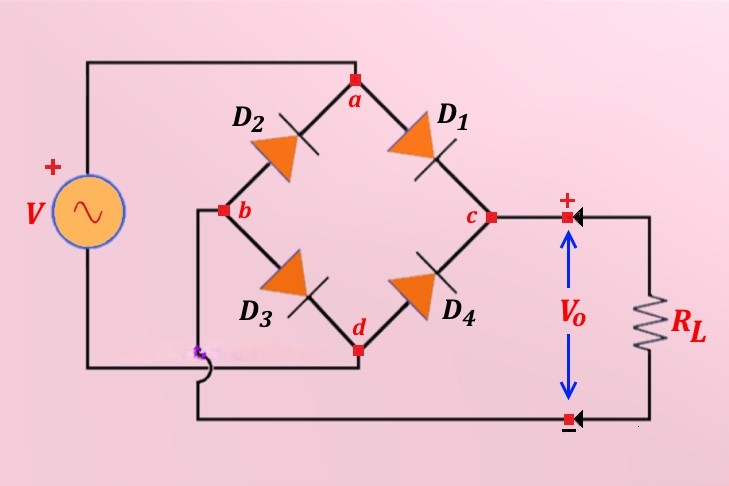

Para simular un rectificador de onda completa se reemplazará este circuito por una entada de tensión senoidal rectificada

##Carga netamente resistiva

- Para este caso, el circuito responde a:

$V_R(s) =R I_{in}(s)$

$\frac{V_R(s)}{V_{in}(s)}=1$

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

In [ ]:
R_v=float(input("Ingrese el valor de R: "))

Ingrese el valor de R: 500


In [ ]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([0,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0 1]


In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2 * np.pi * Fo * t)  # Tren de pulsos para la señal rectificada completa
in_ = in_o * rec_c  # Entrada rectificada completa
#in_ = np.abs(in_o) #señal rectificada
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

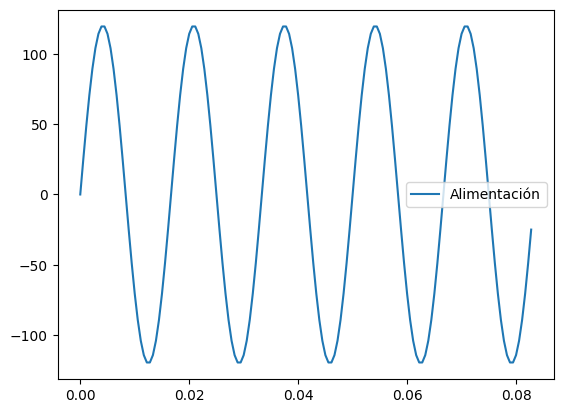

In [ ]:
#señales de alimentación
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

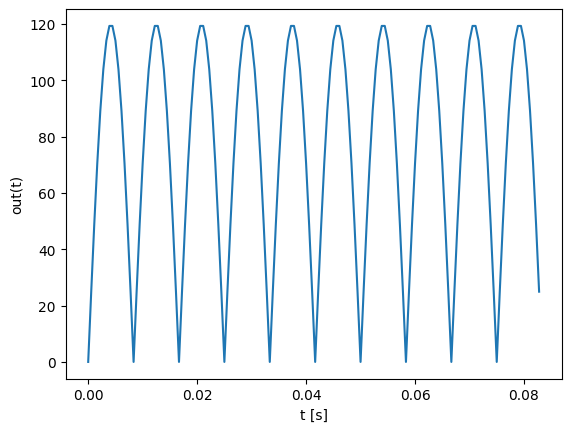

In [ ]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
#plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

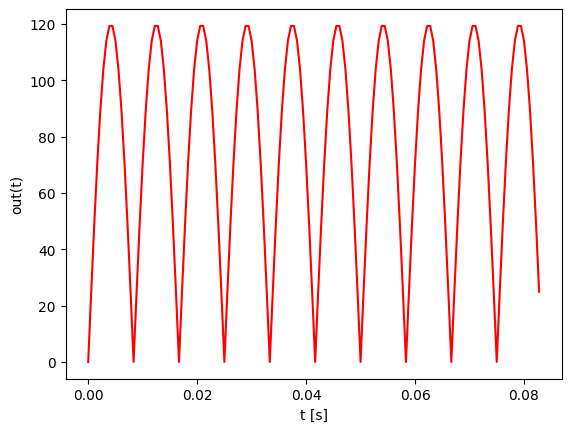

In [ ]:
#plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,c="r",label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Debido a que la resistencia es una carga no almacenadora de energía, el voltaje de entrada es igual al voltaje de salida

##Calculo del espectro

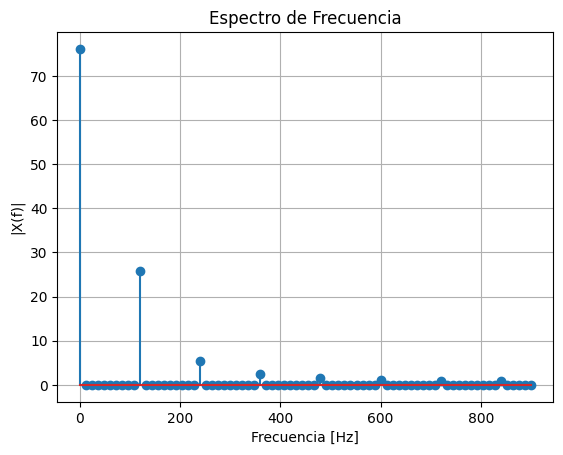

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

In [ ]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [ ]:
# Cálculo del THD para el circuito R
thd_r = calcular_thd(out, Fs)
print(f"THD del circuito con carga resistiva: {thd_r * 100:.2f}%")

THD del circuito con carga resistiva: 34.84%


In [ ]:
pf=np.sqrt(1/(1+(thd_r)**2))
print(f"El factor de potencia de la señal con carga resistiva: {pf:.4f}")

El factor de potencia de la señal con carga resistiva: 0.9443


In [ ]:
R_v=float(input("Ingrese el valor de R: "))
C_v=float(input("Ingrese el valor de C: "))

# Función de transferencia del circuito RC
num = np.array([1])
den = np.array([R_v * C_v, 1])
G_n = sig.TransferFunction(num, den)
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Ingrese el valor de R: 500
Ingrese el valor de C: 10e-6


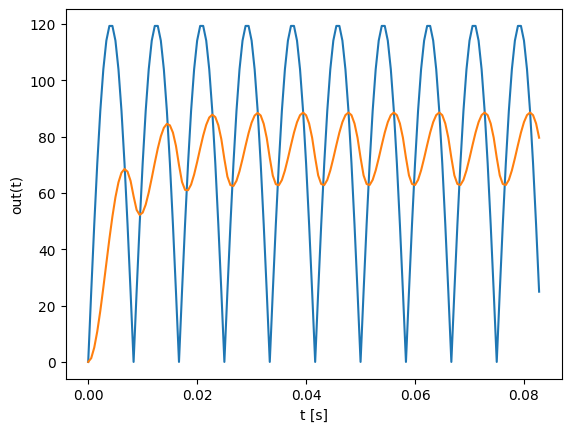

In [ ]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

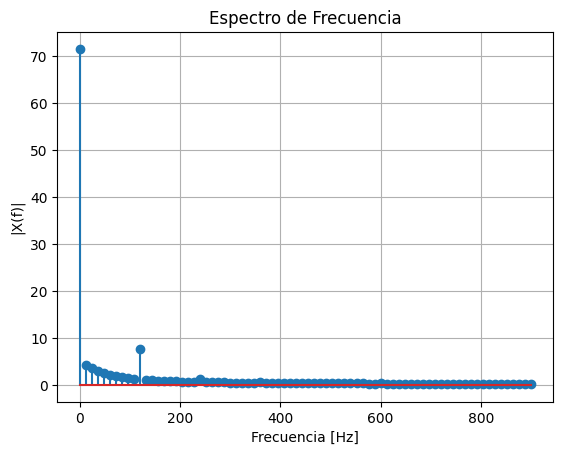

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

In [ ]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [ ]:
# Cálculo del THD para el circuito RC (con filtro)
thd_rc = calcular_thd(out, Fs)
print(f"THD del circuito RC: {thd_rc * 100:.2f}%")

THD del circuito RC: 16.33%


In [ ]:
pf=np.sqrt(1/(1+(thd_rc)**2))
print(f"El factor de potencia de la señal con carga RC: {pf:.4f}")

El factor de potencia de la señal con carga RC: 0.9869


#PUNTO 4

In [ ]:
import os
import zipfile
import pandas as pd
from google.colab import files

# 1️⃣ SUBIR Y EXTRAER EL ZIP
uploaded = files.upload()  # Subir archivo ZIP manualmente

# Obtener el nombre del ZIP subido
zip_filename = list(uploaded.keys())[0]

# Extraer el contenido del ZIP en la raíz
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

# Verificar si la carpeta "audios" existe
extract_folder = "audios"
if extract_folder not in os.listdir():
    print(f"⚠️ No se encontró la carpeta '{extract_folder}' en la raíz. Verifica la estructura.")

# 2️⃣ CREAR LA BASE DE DATOS
base_path = os.path.join(os.getcwd(), extract_folder)
datos = []

# Recorrer las carpetas dentro de "audios" para clasificar los archivos
for carpeta in os.listdir(base_path):
    carpeta_path = os.path.join(base_path, carpeta)

    if os.path.isdir(carpeta_path):  # Asegurar que es una carpeta
        if "samuel" in carpeta.lower():
            etiqueta = 1
        elif "sebastian" in carpeta.lower():
            etiqueta = 2
        else:
            continue  # Ignorar otras carpetas no relacionadas

        # Procesar archivos dentro de la carpeta
        for archivo in os.listdir(carpeta_path):
            if archivo.lower().endswith(".wav"):  # Solo archivos .wav
                ruta_completa = os.path.join(carpeta, archivo)  # Ruta relativa
                datos.append([ruta_completa, carpeta, "audio", etiqueta])

# Verificar si se encontraron archivos
if not datos:
    print("⚠️ No se encontraron archivos .wav en las carpetas esperadas.")

# 3️⃣ CREAR DATAFRAME Y MOSTRARLO ESTILO TABLA
df = pd.DataFrame(datos, columns=["link", "Estudiante", "type", "type_num"])

# Configurar Pandas para que no corte los links
pd.set_option("display.max_colwidth", None)

# Mostrar la tabla en formato limpio
print("\n📊 Base de Datos Generada:")
display(df)


Saving audios.zip to audios.zip

📊 Base de Datos Generada:


,link,Estudiante,type,type_num
0,Sebastian/segment_19.wav,Sebastian,audio,2
1,Sebastian/segment_43.wav,Sebastian,audio,2
2,Sebastian/segment_7.wav,Sebastian,audio,2
3,Sebastian/segment_35.wav,Sebastian,audio,2
4,Sebastian/segment_17.wav,Sebastian,audio,2
...,...,...,...,...
83,Samuel/segment_9.wav,Samuel,audio,1
84,Samuel/segment_2.wav,Samuel,audio,1
85,Samuel/segment_33.wav,Samuel,audio,1
86,Samuel/segment_30.wav,Samuel,audio,1
